In [3]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Trigram_Combine NEW sent pol .csv',header=None,names=["sentiment","text","polarity","repetations"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer


In [4]:
#descriptions
print(messages.describe())

           polarity   repetations
count  58041.000000  58041.000000
mean       0.019550      1.304750
std        0.173154      4.239845
min       -1.000000      1.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max        1.000000    331.000000


In [5]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative     4327
neutral     45680
positive     8034
dtype: int64


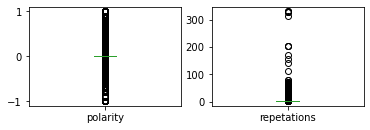

In [6]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [7]:
messages['text']

0                red nviolets blue
1                nviolets blue got
2        valentinesday covid roses
3                  covid roses red
4               roses red nviolets
                   ...            
58036               watch says top
58037              says top health
58038          top health official
58039        health official covid
58040        official covid odisha
Name: text, Length: 58041, dtype: object

In [8]:
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer
import re
corpus = []
lemmatizer = WordNetLemmatizer()
 
    



for i in range(0,len(messages['text'])):
    
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.split()
  
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    review=[e for e in review if e not in non_word]
    
    corpus.append(review)
   

In [9]:
corpus

[['red', 'nviolets', 'blue'],
 ['nviolets', 'blue', 'got'],
 ['valentinesday', 'covid', 'rose'],
 ['covid', 'rose', 'red'],
 ['rose', 'red', 'nviolets'],
 ['blue', 'got', 'vaccine'],
 ['gmt', 'coronavirus', 'coronavirusupdate'],
 ['coronavirus', 'coronavirusupdate', 'covid'],
 ['coronavirusupdate', 'covid', 'coronaviruspandemi'],
 ['new', 'covid', 'case'],
 ['new', 'case', 'new'],
 ['case', 'new', 'death'],
 ['xx', 'xx', 'xx'],
 ['report', 'new', 'covid'],
 ['confirmed', 'covid', 'case'],
 ['covid', 'insight', 'analytics'],
 ['total', 'confirmed', 'covid'],
 ['insight', 'analytics', 'team'],
 ['covid', 'case', 'county'],
 ['analytics', 'team', 'usafacts'],
 ['case', 'ndeaths', 'nrecovered'],
 ['ndeaths', 'nrecovered', 'nactive'],
 ['nrecovered', 'nactive', 'case'],
 ['coronavirus', 'covid', 'covid'],
 ['covid', 'vax', 'administered'],
 ['vax', 'administered', 'current'],
 ['administered', 'current', 'rate'],
 ['tested', 'positive', 'covid'],
 ['covid', 'case', 'recovery'],
 ['death', '

In [10]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)


In [11]:
X

['red nviolets blue ',
 'nviolets blue got ',
 'valentinesday covid rose ',
 'covid rose red ',
 'rose red nviolets ',
 'blue got vaccine ',
 'gmt coronavirus coronavirusupdate ',
 'coronavirus coronavirusupdate covid ',
 'coronavirusupdate covid coronaviruspandemi ',
 'new covid case ',
 'new case new ',
 'case new death ',
 'xx xx xx ',
 'report new covid ',
 'confirmed covid case ',
 'covid insight analytics ',
 'total confirmed covid ',
 'insight analytics team ',
 'covid case county ',
 'analytics team usafacts ',
 'case ndeaths nrecovered ',
 'ndeaths nrecovered nactive ',
 'nrecovered nactive case ',
 'coronavirus covid covid ',
 'covid vax administered ',
 'vax administered current ',
 'administered current rate ',
 'tested positive covid ',
 'covid case recovery ',
 'death last hour ',
 'new covid data ',
 'est coronavirus covid ',
 'current rate kvax ',
 'rate kvax day ',
 'nactive case ncompleted ',
 'case recovery death ',
 'president venkaiah naidu ',
 'recovery death last

In [12]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=200)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [13]:
w=messages['sentiment']

In [14]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(Y, w, test_size=0.20, random_state=1)

In [15]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [16]:
#Spot Check Algorithms
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy
import time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("score",score1)


LR: 0.876981 (0.004384) time taken (8.467681)
score (0.8750969075717117, 0.8750969075717117, 0.8750969075717117, None)
LDA: 0.876723 (0.004128) time taken (25.830536)
score (0.8751830476354553, 0.8751830476354553, 0.8751830476354553, None)
KNN: 0.853032 (0.016530) time taken (1179.535991)
score (0.8594194159703679, 0.8594194159703679, 0.8594194159703678, None)
CART: 0.872028 (0.004263) time taken (226.729930)
score (0.8719958652769403, 0.8719958652769403, 0.8719958652769403, None)
NB: 0.433063 (0.024887) time taken (5.937523)
score (0.4399173055388061, 0.4399173055388061, 0.4399173055388061, None)
SVM: 0.852968 (0.003497) time taken (11038.345601)
score (0.8616590576277027, 0.8616590576277027, 0.8616590576277027, None)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [18]:
# Spot Check Algorithms
models = []

models.append(('MultiNB', MultinomialNB()))
models.append(('BerNB', BernoulliNB()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearSVC', LinearSVC(max_iter=5000)))
models.append(('Adab', AdaBoostClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PassiveAC', PassiveAggressiveClassifier()))
models.append(('Perceptron',  Perceptron()))
models.append(('RFT', RandomForestClassifier()))
models.append(('MLP', MLPClassifier(max_iter=1000)))
# evaluate each model in turn
results = []
names = []
accuracy=[]
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	start=time.time()
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	model1=model.fit(X_train,Y_train)
	y_pred=model1.predict(X_validation)    
	end=time.time()
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f) %s (%f)' % (name, cv_results.mean(), cv_results.std(),'time taken',end-start))
	score1=precision_recall_fscore_support(Y_validation.astype(str),y_pred.astype(str),labels=['neutral','negative','positive'],average='micro',zero_division=1)   
	print("\nscore",score1)
   

MultiNB: 0.876895 (0.004402) time taken (5.574131)

score (0.8749246274442243, 0.8749246274442243, 0.8749246274442243, None)
BerNB: 0.876917 (0.004476) time taken (6.354107)

score (0.8750107675079679, 0.8750107675079679, 0.8750107675079679, None)
LR: 0.876981 (0.004384) time taken (4.737538)

score (0.8750969075717117, 0.8750969075717117, 0.8750969075717117, None)
LinearSVC: 0.877046 (0.004353) time taken (17.132325)

score (0.8750969075717117, 0.8750969075717117, 0.8750969075717117, None)
Adab: 0.876701 (0.004395) time taken (157.633767)

score (0.8750107675079679, 0.8750107675079679, 0.8750107675079679, None)
Ridge: 0.876723 (0.004365) time taken (5.044369)

score (0.8750969075717117, 0.8750969075717117, 0.8750969075717117, None)
PassiveAC: 0.873622 (0.005048) time taken (10.007483)

score (0.8743216469980187, 0.8743216469980187, 0.8743216469980187, None)
Perceptron: 0.808515 (0.108077) time taken (6.361096)

score (0.859850116289086, 0.859850116289086, 0.859850116289086, None)
RFT:

In [19]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10    positive
11    positive
12     neutral
13    positive
14    positive
15     neutral
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

Accuracy of the LR model is for neutral class 0.8789732104401757
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.792


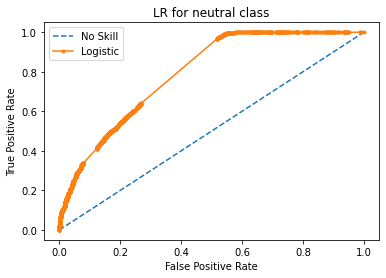

In [20]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy of the LR model is for neutral class 0.8788009303126885
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.721


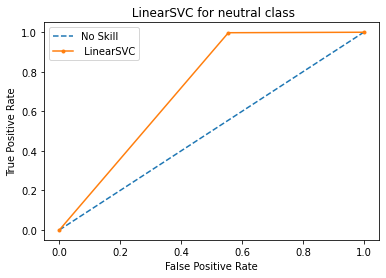

In [21]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [22]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,2].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10    positive
11    positive
12     neutral
13    positive
14    positive
15     neutral
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=uint8)

Accuracy of the LR model is for positive class 0.930657248686364
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.824


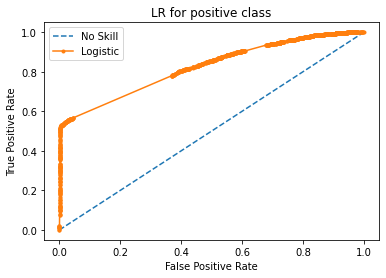

In [23]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the LinearSVC model is for positive class 0.9307433887501076
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.760


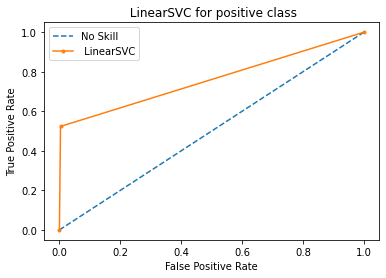

In [24]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,0].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10    positive
11    positive
12     neutral
13    positive
14    positive
15     neutral
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Accuracy of the LR model is for negative class 0.9435782582479111
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.739


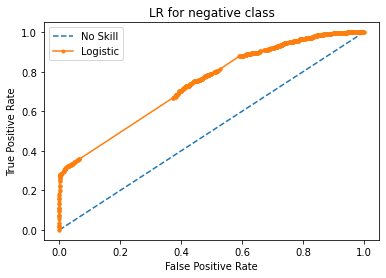

In [26]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for negative class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the LinearSVC model is for Negative class 0.9438366784391421
No Skill: ROC AUC=0.500
LinearSVC: ROC AUC=0.632


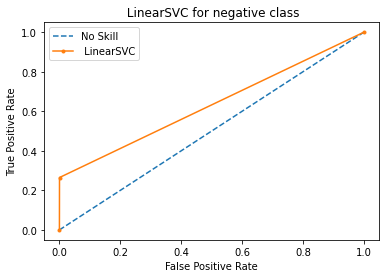

In [27]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for Negative class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LinearSVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the MLP  negative model is 0.9422861572917564
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.732


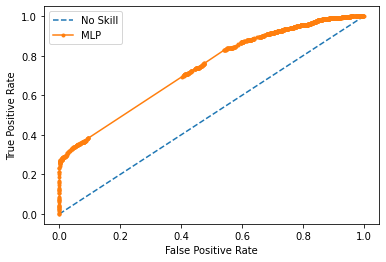

In [28]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = MLPClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the MLP  negative model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()